# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
#data = pd.read_csv("census.csv")
data = pd.read_csv('/home/ralph/Documents/UDACITY/Machine_Learning/finding_donors/census.csv')
data_explore = pd.read_csv('/home/ralph/Documents/UDACITY/Machine_Learning/finding_donors/census.csv')
#data = pd.read_csv('C:/Users/a0062133/Documents/udacity/machine-learning-master/machine-learning-master/projects/finding_donors/census.csv')   


# Success - Display the first record
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [2]:
# TODO: Total number of records
n_records = data['age'].count()

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = data[data.income == '>50K'].income.count()

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = data[data.income == '<=50K'].income.count()

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = (float(n_greater_50k)/float(n_records))*100

# Print the results
print ("Total number of records: {}".format(n_records))
print ("Individuals making more than $50,000: {}".format(n_greater_50k))
print ("Individuals making at most $50,000: {}".format(n_at_most_50k))
print ("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


# Let me know more about others featurers 

In [3]:
#Age--------------------------------------------------------------

def fx_age_(data_explore):
     
    if     data_explore['age'] <= 18: return   18
    elif   data_explore['age'] <= 25: return   25
    elif   data_explore['age'] <= 30: return   30
    elif   data_explore['age'] <= 35: return   35
    elif   data_explore['age'] <= 40: return   40
    elif   data_explore['age'] <= 45: return   45
    elif   data_explore['age'] <= 50: return   50
    elif   data_explore['age'] <= 60: return   60
    elif   data_explore['age'] <= 70: return   70
    elif   data_explore['age']  > 70: return   71
    else: return 0
   
data_explore['fx_age'] = data_explore.apply(fx_age_, axis = 1)

print(data_explore.groupby(['fx_age'])[['fx_age']].count())
print ("")
age_group = data_explore.groupby('fx_age')
print (age_group['age'].agg([np.mean,np.sum,np.max]))
print ("")
test = data_explore.groupby(['fx_age',"income"])[['fx_age']].count()
print ("")
test = data_explore.groupby(['fx_age',"income"])[['fx_age']].count()
test_=test.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print(test_)
test_.head()
crostab_age = pd.crosstab(index = data_explore['fx_age'],columns = data_explore['income'],
                                                                    margins= True)
crostab_age
crostab_age/crostab_age.ix["All"]

        fx_age
fx_age        
18        1188
25        7253
30        5819
35        6255
40        6036
45        5436
50        4554
60        5833
70        2212
71         636

             mean     sum  amax
fx_age                         
18      17.585017   20891    18
25      22.212464  161107    25
30      28.042275  163178    30
35      33.005436  206449    35
40      37.944003  229030    40
45      42.939662  233420    45
50      47.847606  217898    50
60      54.940511  320468    60
70      64.316004  142267    70
71      76.268868   48507    90


                   fx_age
fx_age income            
18     <=50K   100.000000
25     <=50K    97.752654
       >50K      2.247346
30     <=50K    86.234748
       >50K     13.765252
35     <=50K    75.875300
       >50K     24.124700
40     <=50K    66.915176
       >50K     33.084824
45     <=50K    62.766740
       >50K     37.233260
50     <=50K    59.705753
       >50K     40.294247
60     <=50K    62.815018
       >50K     3

income,<=50K,>50K,All
fx_age,,,
18,0.034927,0.000000,0.026270
25,0.208444,0.014543,0.160387
30,0.147527,0.071467,0.128676
35,0.139531,0.134636,0.138318
40,0.118745,0.178176,0.133475
45,0.100312,0.180585,0.120207
50,0.079938,0.163722,0.100703
60,0.107720,0.193522,0.128986
70,0.047863,0.052106,0.048914


In [6]:
#education_level
#--------------------------------------------------------------------
print(data_explore.groupby(['education_level'])[['education_level']].count())
print("")
test = data_explore.groupby(['education_level',"income"])[['education_level']].count()
test=test.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print(test)

                 education_level
education_level                 
 10th                       1223
 11th                       1619
 12th                        577
 1st-4th                     222
 5th-6th                     449
 7th-8th                     823
 9th                         676
 Assoc-acdm                 1507
 Assoc-voc                  1959
 Bachelors                  7570
 Doctorate                   544
 HS-grad                   14783
 Masters                    2514
 Preschool                    72
 Prof-school                 785
 Some-college               9899

                        education_level
education_level income                 
 10th           <=50K         93.295176
                >50K           6.704824
 11th           <=50K         94.502779
                >50K           5.497221
 12th           <=50K         92.547660
                >50K           7.452340
 1st-4th        <=50K         96.396396
                >50K           3.603604
 5th-

In [7]:
#workclass
#--------------------------------------------------------------------
print(data_explore.groupby(['workclass'])[['workclass']].count())
print("")
test = data_explore.groupby(['workclass',"income"])[['workclass']].count()
test=test.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print(test)

                   workclass
workclass                   
 Federal-gov            1406
 Local-gov              3100
 Private               33307
 Self-emp-inc           1646
 Self-emp-not-inc       3796
 State-gov              1946
 Without-pay              21

                          workclass
workclass         income           
 Federal-gov      <=50K   60.953058
                  >50K    39.046942
 Local-gov        <=50K   70.483871
                  >50K    29.516129
 Private          <=50K   78.229802
                  >50K    21.770198
 Self-emp-inc     <=50K   44.592953
                  >50K    55.407047
 Self-emp-not-inc <=50K   72.102213
                  >50K    27.897787
 State-gov        <=50K   73.278520
                  >50K    26.721480
 Without-pay      <=50K   90.476190
                  >50K     9.523810


In [8]:
#workclass
#--------------------------------------------------------------------
print(data_explore.groupby(['education-num'])[['education-num']].count())
print("")
test = data_explore.groupby(['education-num',"income"])[['education-num']].count()
test=test.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print(test)

               education-num
education-num               
1.0                       72
2.0                      222
3.0                      449
4.0                      823
5.0                      676
6.0                     1223
7.0                     1619
8.0                      577
9.0                    14783
10.0                    9899
11.0                    1959
12.0                    1507
13.0                    7570
14.0                    2514
15.0                     785
16.0                     544

                      education-num
education-num income               
1.0           <=50K       98.611111
              >50K         1.388889
2.0           <=50K       96.396396
              >50K         3.603604
3.0           <=50K       95.100223
              >50K         4.899777
4.0           <=50K       93.317132
              >50K         6.682868
5.0           <=50K       94.378698
              >50K         5.621302
6.0           <=50K       93.295176
         

In [9]:
#marital-status
#--------------------------------------------------------------------
print(data_explore.groupby(['marital-status'])[['marital-status']].count())
print("")
test = data_explore.groupby(['marital-status',"income"])[['marital-status']].count()
test=test.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print(test)

                        marital-status
marital-status                        
 Divorced                         6297
 Married-AF-spouse                  32
 Married-civ-spouse              21055
 Married-spouse-absent             552
 Never-married                   14598
 Separated                        1411
 Widowed                          1277

                               marital-status
marital-status         income                
 Divorced              <=50K        89.598221
                       >50K         10.401779
 Married-AF-spouse     <=50K        56.250000
                       >50K         43.750000
 Married-civ-spouse    <=50K        54.576110
                       >50K         45.423890
 Married-spouse-absent <=50K        90.217391
                       >50K          9.782609
 Never-married         <=50K        95.197972
                       >50K          4.802028
 Separated             <=50K        92.983700
                       >50K          7.016300
 Wid

In [10]:
#print(data_explore.groupby(['occupation'])[['occupation']].count())
#--------------------------------------------------------------------
print(data_explore.groupby(['occupation'])[['occupation']].count())
print("")
test = data_explore.groupby(['occupation',"income"])[['occupation']].count()
test=test.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print(test)

                    occupation
occupation                    
 Adm-clerical             5540
 Armed-Forces               14
 Craft-repair             6020
 Exec-managerial          5984
 Farming-fishing          1480
 Handlers-cleaners        2046
 Machine-op-inspct        2970
 Other-service            4808
 Priv-house-serv           232
 Prof-specialty           6008
 Protective-serv           976
 Sales                    5408
 Tech-support             1420
 Transport-moving         2316

                           occupation
occupation         income            
 Adm-clerical      <=50K    86.353791
                   >50K     13.646209
 Armed-Forces      <=50K    71.428571
                   >50K     28.571429
 Craft-repair      <=50K    77.491694
                   >50K     22.508306
 Exec-managerial   <=50K    52.088904
                   >50K     47.911096
 Farming-fishing   <=50K    88.378378
                   >50K     11.621622
 Handlers-cleaners <=50K    93.401760
         

In [11]:
#relationship
#--------------------------------------------------------------------
print(data_explore.groupby(['relationship'])[['relationship']].count())
print("")
test = data_explore.groupby(['relationship',"income"])[['relationship']].count()
test=test.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print(test)

                 relationship
relationship                 
 Husband                18666
 Not-in-family          11702
 Other-relative          1349
 Own-child               6626
 Unmarried               4788
 Wife                    2091

                        relationship
relationship    income              
 Husband        <=50K      54.425158
                >50K       45.574842
 Not-in-family  <=50K      89.506067
                >50K       10.493933
 Other-relative <=50K      96.293551
                >50K        3.706449
 Own-child      <=50K      98.415334
                >50K        1.584666
 Unmarried      <=50K      93.692565
                >50K        6.307435
 Wife           <=50K      51.410808
                >50K       48.589192


In [12]:
#race
#--------------------------------------------------------------------
print(data_explore.groupby(['race'])[['race']].count())
print("")
test = data_explore.groupby(['race',"income"])[['race']].count()
test=test.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print(test)

                      race
race                      
 Amer-Indian-Eskimo    435
 Asian-Pac-Islander   1303
 Black                4228
 Other                 353
 White               38903

                                 race
race                income           
 Amer-Indian-Eskimo <=50K   87.816092
                    >50K    12.183908
 Asian-Pac-Islander <=50K   71.680737
                    >50K    28.319263
 Black              <=50K   87.369915
                    >50K    12.630085
 Other              <=50K   87.252125
                    >50K    12.747875
 White              <=50K   73.762949
                    >50K    26.237051


In [13]:
#sex
#--------------------------------------------------------------------
print(data_explore.groupby(['sex'])[['sex']].count())
print("")
test = data_explore.groupby(['sex',"income"])[['sex']].count()
test=test.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print(test)

           sex
sex           
 Female  14695
 Male    30527

                      sex
sex     income           
 Female <=50K   88.642395
        >50K    11.357605
 Male   <=50K   68.752252
        >50K    31.247748


In [14]:
#capital-gain
#--------------------------------------------------------------------
def fx_cpt_gain_(data_explore):
     
    if     data_explore['capital-gain'] <= 0     : return   0
    elif   data_explore['capital-gain'] <= 300   : return   300
    elif   data_explore['capital-gain'] <= 1500  : return   1500
    elif   data_explore['capital-gain'] <= 2500  : return   2500
    elif   data_explore['capital-gain'] <= 3500  : return   3500
    elif   data_explore['capital-gain'] <= 5000  : return   5000
    elif   data_explore['capital-gain'] <= 6500  : return   6500
    elif   data_explore['capital-gain'] <= 8000  : return   8000
    elif   data_explore['capital-gain'] <= 10000 : return   10000
    elif   data_explore['capital-gain']  > 10000 : return   10001
    else: return 0
   
data_explore['fx_cpt_gain'] = data_explore.apply(fx_cpt_gain_, axis = 1)

print (data_explore.groupby(['fx_cpt_gain'])[['fx_cpt_gain']].count() )
print ("") 
test = data_explore.groupby(['fx_cpt_gain',"income"])[['fx_cpt_gain']].count()
test=test.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print (test) 

             fx_cpt_gain
fx_cpt_gain             
0                  41432
300                    8
1500                 132
2500                 288
3500                 553
5000                 471
6500                 319
8000                 827
10000                106
10001               1086

                    fx_cpt_gain
fx_cpt_gain income             
0           <=50K     78.680730
            >50K      21.319270
300         <=50K    100.000000
1500        <=50K    100.000000
2500        <=50K    100.000000
3500        <=50K     75.045208
            >50K      24.954792
5000        <=50K     71.337580
            >50K      28.662420
6500        <=50K     50.470219
            >50K      49.529781
8000        <=50K      7.134220
            >50K      92.865780
10000       >50K     100.000000
10001       <=50K      1.473297
            >50K      98.526703


In [15]:
#capital-loss
#--------------------------------------------------------------------
def fx_cpt_loss_(data_explore):
     
    if     data_explore['capital-loss'] <= 0     : return   0
    elif   data_explore['capital-loss'] <= 1500  : return   1500
    elif   data_explore['capital-loss'] <= 1700  : return   1700
    elif   data_explore['capital-loss'] <= 1900  : return   1900
    elif   data_explore['capital-loss'] <= 2100  : return   2100
    elif   data_explore['capital-loss'] <= 2300  : return   2300
    elif   data_explore['capital-loss'] <= 2500  : return   2500
    elif   data_explore['capital-loss']  > 2500  : return   2501
    else: return 0
   
data_explore['fx_cpt_loss'] = data_explore.apply(fx_cpt_loss_, axis = 1)

print(data_explore.groupby(['fx_cpt_loss'])[['fx_cpt_loss']].count())
print("")
test = data_explore.groupby(['fx_cpt_loss',"income"])[['fx_cpt_loss']].count()
test=test.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print(test)

             fx_cpt_loss
fx_cpt_loss             
0                  43082
1500                 188
1700                 348
1900                 547
2100                 727
2300                 121
2500                 153
2501                  56

                    fx_cpt_loss
fx_cpt_loss income             
0           <=50K     76.533123
            >50K      23.466877
1500        <=50K     76.595745
            >50K      23.404255
1700        <=50K     88.505747
            >50K      11.494253
1900        <=50K     45.338208
            >50K      54.661792
2100        <=50K     28.060523
            >50K      71.939477
2300        <=50K     65.289256
            >50K      34.710744
2500        <=50K     27.450980
            >50K      72.549020
2501        <=50K     30.357143
            >50K      69.642857


In [16]:
#hours-per-week:
#precisa criar faixa
#--------------------------------------------------------------------

def fx_hperweek_(data_explore):
     
    if     data_explore['hours-per-week'] <= 0 : return   0
    elif   data_explore['hours-per-week'] <= 8 : return   8
    elif   data_explore['hours-per-week'] <= 16: return   16
    elif   data_explore['hours-per-week'] <= 24: return   24
    elif   data_explore['hours-per-week'] <= 32: return   32
    elif   data_explore['hours-per-week'] <= 36: return   36
    elif   data_explore['hours-per-week'] <= 40: return   40
    elif   data_explore['hours-per-week'] <= 48: return   48
    elif   data_explore['hours-per-week'] <= 56: return   56
    elif   data_explore['hours-per-week'] <= 64: return   64
    elif   data_explore['hours-per-week'] <= 72: return   72
    elif   data_explore['hours-per-week']  > 73: return   73
    else: return 0
   
data_explore['fx_hours_per_week'] = data_explore.apply(fx_hperweek_, axis = 1)

print(data_explore.groupby(['fx_hours_per_week'])[['fx_hours_per_week']].count())
print("")
test = data_explore.groupby(['fx_hours_per_week',"income"])[['fx_hours_per_week']].count()
test=test.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print(test)

                   fx_hours_per_week
fx_hours_per_week                   
0                                  3
8                                421
16                              1408
24                              2208
32                              2881
36                              2190
40                             22337
48                              4446
56                              5595
64                              2209
72                               909
73                               615

                          fx_hours_per_week
fx_hours_per_week income                   
0                 <=50K           66.666667
                  >50K            33.333333
8                 <=50K           90.023753
                  >50K             9.976247
16                <=50K           94.247159
                  >50K             5.752841
24                <=50K           93.387681
                  >50K             6.612319
32                <=50K           92.9538

In [84]:
#native-country:
#precisa criar faixa
#--------------------------------------------------------------------
print(data_explore.groupby(['native-country'])[['native-country']].count())
print("")
test = data_explore.groupby(['native-country',"income"])[['native-country']].count()
test=test.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print(test)

                             native-country
native-country                             
 Cambodia                                26
 Canada                                 163
 China                                  113
 Columbia                                82
 Cuba                                   133
 Dominican-Republic                      97
 Ecuador                                 43
 El-Salvador                            147
 England                                119
 France                                  36
 Germany                                193
 Greece                                  49
 Guatemala                               86
 Haiti                                   69
 Holand-Netherlands                       1
 Honduras                                19
 Hong                                    28
 Hungary                                 18
 India                                  147
 Iran                                    56
 Ireland                        

** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

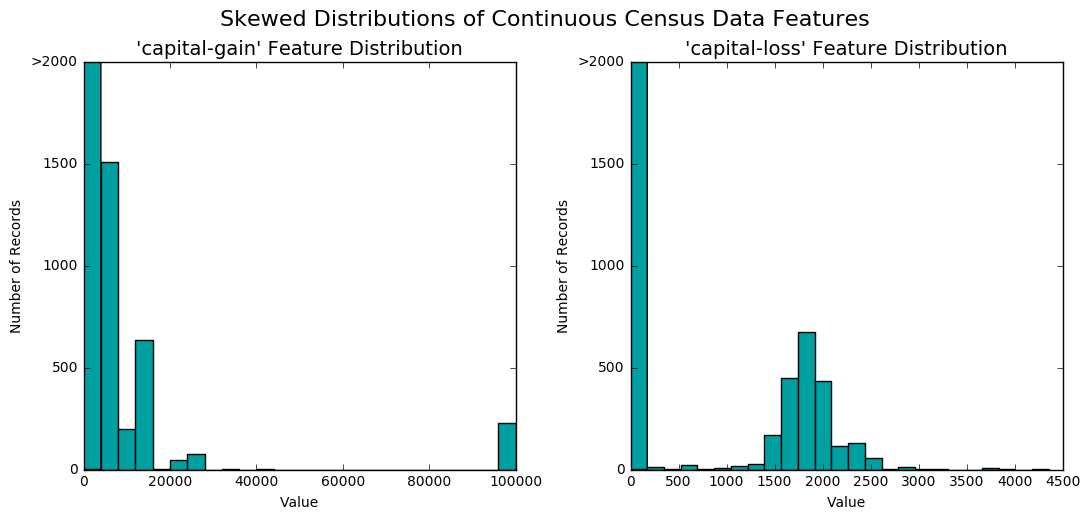

In [18]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

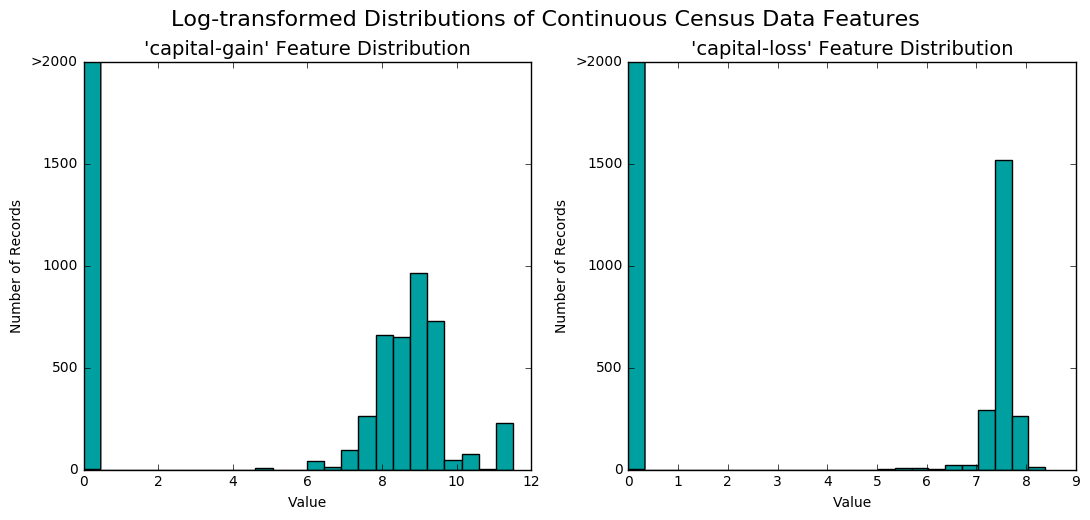

In [19]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))


# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [20]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


In [21]:
grup_log_age = features_log_minmax_transform.groupby(["capital-gain"])["age"].count()
print (grup_log_age)

#print(data_explore.groupby(['fx_hours_per_week'])[['fx_hours_per_week']].count())

capital-gain
0.000000    41432
0.412140        8
0.520845        2
0.554903       42
0.592284       10
0.599302        4
0.604733       31
0.607246        5
0.612290       13
0.613934        2
0.620418        2
0.629844        5
0.630763        4
0.632632        3
0.633582        9
0.635623       23
0.642969        1
0.647710        1
0.650958        8
0.652585        9
0.653387        8
0.660639        2
0.661798        5
0.662393        3
0.662900        3
0.664692       11
0.667492       72
0.667572       28
0.668603       27
0.669622        3
            ...  
0.767138       41
0.772223        1
0.772653      351
0.774209       14
0.774361        7
0.777174      391
0.779492        3
0.780390        2
0.787051       78
0.794505       23
0.796119        5
0.804411       64
0.804790        8
0.805110       16
0.813481        4
0.826394       40
0.829751       47
0.831340       34
0.835340       10
0.835363      498
0.839907        8
0.853350        2
0.860432       44
0.868646       

### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_raw'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [22]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# TODO: Encode the 'income_raw' data to numerical values
income =  income_raw.apply(lambda x: 1 if x == ">50K" else 0)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print ("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print (encoded)
print (income)

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

In [23]:
features_final

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.667492,0.000000,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.000000,0.000000,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.000000,0.000000,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.000000,0.000000,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.000000,0.000000,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.273973,0.866667,0.000000,0.000000,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.438356,0.266667,0.000000,0.000000,0.153061,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.479452,0.533333,0.000000,0.000000,0.448980,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8,0.191781,0.866667,0.829751,0.000000,0.500000,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0.342466,0.800000,0.742849,0.000000,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [24]:
list(features_final)
features_final.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.667492,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.000000,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [25]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$


In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

**Answer: **

>> The accuracy ad the F-score on this dataset would be 0.2478 and 0.2917 respectively

In [26]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
TN = 0
FN = 0
TP = np.sum(income) 
FP = income.count()-np.sum(income)

# TODO: Calculate accuracy, precision and recall
accuracy  = float(n_greater_50k)/float(n_records)
recall    = float(TP)/(TP+FN)
precision = float(TP)/(TP+FP)

print(accuracy)
print(recall)
print(precision)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
# HINT: The formula above can be written as (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)
beta = 0.5
fscore = (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

# Print the results 
print ("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

0.2478439697492371
1.0
0.247843969749
Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What 
the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

**Answer: **

### Decision Trees - Id3

I'm describing Id3 algorithm knowing that scikit-learn uses an optimised version of the CART algorithm.

- Id3 is a descision tree algorithm that is used in business today. This algorithm helps companies and managers to define an optimal target public based on rules created by previous learning. This technique can be applyed in e-mail market campaigns to find the public that has the ablity to convert in any purchase or even in a public selection to offer a credit. The algorithm creates a multiway tree, finding for each node (i.e. in a greedy manner) the categorical feature that will yield the largest information gain for categorical targets. (http://scikit-learn.org/stable/modules/tree.html)

- This kind of algorithm has strengths in the interpretation because the results are visible in the tree structure (white box), it leaves the business easier to interpret while other algorithm are not easy to explain like neural network that are called black box. In small dataset, the algorithm is very fast to learn and other datas can be classified by the learned rules. Also it can learn any non-linear relationship between the atributes and is able to handle multi-output problems.

- One of the weakness of Id3 is that data can be over-fitted if a small sample is tested and a pruned mode is not used. It also can over-fit when large number of features are used. In some case, continuos data should be avoided because it can take a long time to process and can have a high use of memory.

- Id3 is a good candidate to test on the census data. We have around 45,000 records and the algorithm can run very fast. We can tune the decision tree using Random Forest that can run several decision trees in parallel and avoid some cases of overfitting. The decision tree is able to handle both numerical and categorical data, that is how the data is composed while other techniques are usually specialised in analysing datasets that have only one type of variable.The rsult are also validate using statistical tests. That makes it possible to account for the reliability of the model.(http://scikit-learn.org/stable/modules/tree.html#tree)


### Support Vector Machines (SVM)

- The aim of SVM classifier is to correctly classify an unseen data, based on a previous learning. SVM is used in an image classifier field, pattern recognition and classification problems. In business, it can be used in a credit card customer churn analysis to provide a model with better classification.

- The SVM work really well in complicated domains where there is a clear margin of separation in the data.To correctly classify the data, svm can define higher complex order separation planes through custom kernels, working in a effective way in high dimensional spaces.

- This classifyer doesn't perform in large datasets because the training time can be very costly. They also don't work well in a noise data, when the data is overlapping alot, svm needs to count independent evidences avoiding Naive Bays from being better in this case.

- SVM is a good candidate because 45000 records are good enouth to have a good performance mainly with a clear distinct target variable (more than 50K or less then 50K). The data have a high number of features after one hot encoding, so the SVM could not perform very well because it requires matrix inversion

### Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)

- The Ensemble method Bosting can be used to predict spam e-mail inside a field of business and can be used to identify patterns in face recognition for example.

- It can be used in conjunction with many other types of learning algorithms to improve performance including decision tree. It works by merging several weaks of outputs on the repeatedly modified versions of the data to gernerate an effective classification. The boost method gives extra weight for individual data that had an early unsucessful classification to pay more attention in the next processing.

- AdaBoost is sensitive to noisy data and outliers but in this case de data is clean. In some problems it can be less susceptible to the overfitting problem than other learning algorithms. If a complex model is used as the base classifier, this can lead to overfitting to the training data.

- Adaboost is a good candidate because our data is already clear and is quite large for this method, that also avoid overfitting by limiting how many times they can subdivide and how few data points are allowed in each region. The algorithm constructs a sequence of trees, each of which learns to compensate for the error left by the tree before. The result is a very accurate learner that tends to use a lot of memory (https://docs.microsoft.com/en-us/azure/machine-learning/studio/algorithm-choice)



### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [27]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score

from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end-start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end-start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,beta=0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=0.5)
       
    # Success
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

DecisionTreeClassifier trained on 361 samples.
DecisionTreeClassifier trained on 3617 samples.
DecisionTreeClassifier trained on 36177 samples.
SVC trained on 361 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.
AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.


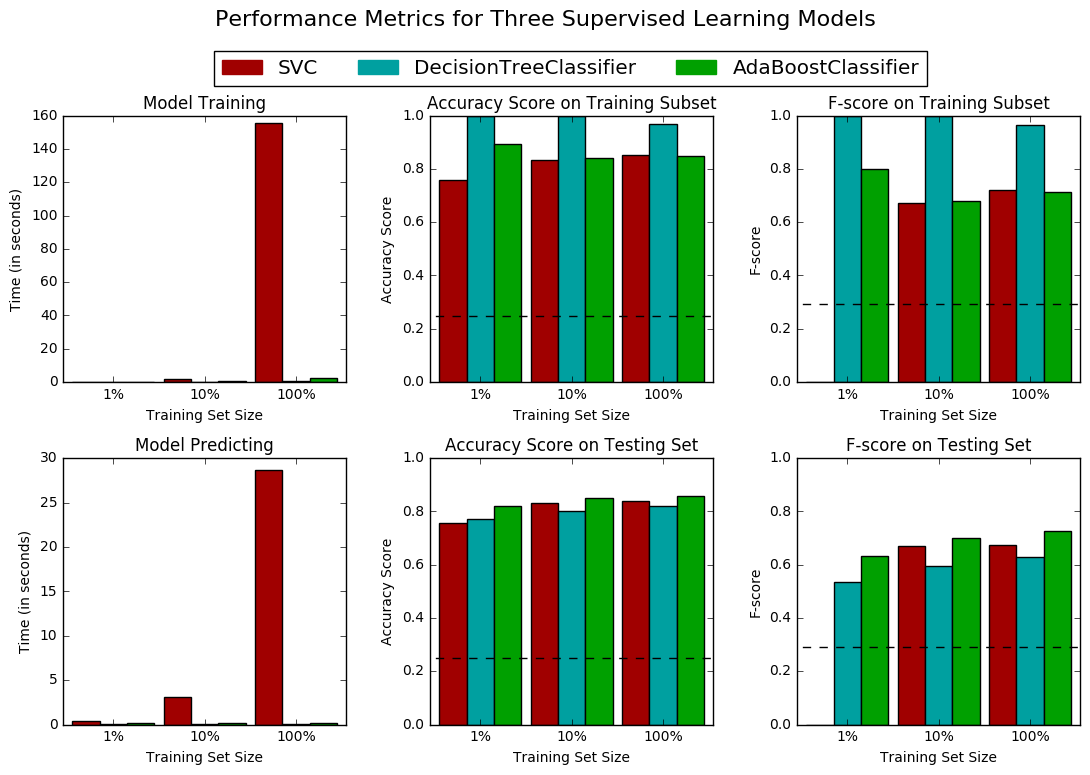

In [28]:
import warnings
warnings.filterwarnings('ignore')


# TODO: Import the three supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

#from id3 import Id3Estimator

# TODO: Initialize the three models
clf_A = DecisionTreeClassifier(random_state = 0)
clf_B = SVC(random_state=0)
clf_C = AdaBoostClassifier(random_state=0)


# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100
# HINT: samples_1 is 1% of samples_100
samples_100 = int(1 * X_train.shape[0])
samples_10 = int(0.1 * X_train.shape[0])
samples_1 = int(0.01 * X_train.shape[0])

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

In [29]:
# show the results in data frame
for i in results.items():
    print(i[0])
    display(pd.DataFrame(i[1]).rename(columns={0:'1%', 1:'10%', 2:'100%'}))

SVC


,1%,10%,100%
acc_test,0.756219,0.832615,0.837148
acc_train,0.760000,0.833333,0.853333
f_test,0.000000,0.671256,0.674477
f_train,0.000000,0.671296,0.719697
pred_time,0.417652,3.118605,28.608652
train_time,0.016333,1.852482,155.564103


DecisionTreeClassifier


,1%,10%,100%
acc_test,0.771918,0.801658,0.818574
acc_train,1.000000,0.996667,0.970000
f_test,0.535978,0.593875,0.627939
f_train,1.000000,0.997191,0.963855
pred_time,0.010599,0.009731,0.009580
train_time,0.004191,0.038132,0.763550


AdaBoostClassifier


,1%,10%,100%
acc_test,0.820674,0.849862,0.857601
acc_train,0.893333,0.840000,0.850000
f_test,0.632757,0.701882,0.724551
f_train,0.801282,0.680147,0.711538
pred_time,0.156492,0.171408,0.147463
train_time,0.105690,0.334866,2.541390


----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

**Answer: **

The most appropriate model for the task of identifying individuals that make more then $50,000, is the Assemble Method Adaboost. In order to  reach this conclusion, three algorithms were used to classify the same dataset and each result was compared between the classifiers to optimize the acuraccy and fscore. I used the decision tree classifier, Adaboost Ensemble Method and SVM.
We can observe from the plots, in comparison to SVC, the Adaboost was able to train the data and predict the results very quickly. The speed of the training and test can be compared with the decision tree that is  faster then SVM. The speedy performance's keep the same in different training set sizes and for 45,000 records. If we increase our dataset, SVM tends to be impracticable.
As we look to accuracy graphs we can see the decision tree classifier geting 100 per cent in the accuracy score and peerformance poorly in test data set, showing us that this classifier decorated the rules and didn't generalize well. Looking to the Adaboost, it performance is significantly higher then the others in the training data in terms of the Fbeta score. Adaboost slightly outperforms SVC and Decision tree at all training set sizes.
The algoritm works very well when the number of data sets increases. We can see in "Accuracy Score on Testing Set" Graph that higher is the training set higher is the accuracy score. The same rules happens to "Fscore on testing Set" graph.

When we compare all of these algorithms, we can assume that by chosing the Ensemble Method Adaboost, we can reach the best results in timely fashion with accuracy for this problem. This model performed well in test and training dataset quickly then the others classifier. In this case we are able to use the full dataset to best performance the results because the time of processing the test and training set is irrelevant

### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.

**Answer: **

To find the best result to the problem when we are leading with several amount of data, we resort to statistic and machine learning techniques. Some of these techniques can perform better than others and several tests must be done to decide which one is better. 

In this case, we choose the Adaboost classifier that is a popular boosting technique which helps you combine multiple “weak classifiers” into a single “strong classifier”. A weak classifier is simply a classifier that performs poorly, but performs better than random guessing.

The Adaboost woks on training set selection as followns:
Each weak classifier should be trained on a random subset of the total training set. AdaBoost give a “weight” to each training example, which determines the probability that each example should appear in the training set. Examples with higher weights are more likely to be included in the training set, and vice versa. After training a classifier, AdaBoost increases the weight on the misclassified examples so that these examples will make up a larger part of the next classifiers training (http://mccormickml.com/2013/12/13/adaboost-tutorial/)

After each classifier is trained, the classifier’s weight is calculated based on its accuracy. More accurate classifiers are given more weight. A classifier with 50% accuracy is given a weight of zero, and a classifier with less than 50% accuracy (kind of a funny concept) is given negative weight.
So, when we have a person with unknown class we would like to predict, we simply feed the features of this person to the model and we can assign the person to one class or the other.


### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [30]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries

import warnings
warnings.filterwarnings('ignore')

from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.svm import SVC

# TODO: Initialize the classifier
Clf = AdaBoostClassifier(random_state = 0)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
#parameters = {'n_estimators': [75,300,500] ,'learning_rate' : [1.0,2.0,5.0] , 'algorithm' : ['SAMME' , 'SAMME.R']}
parameters = {'n_estimators': [100,500,1000] ,'learning_rate' : [1.0,2.0,5.0] , 'algorithm' : ['SAMME' , 'SAMME.R']}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta = 0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring = scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print ("Unoptimized model\n------")
print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8576
F-score on testing data: 0.7246

Optimized Model
------
Final accuracy score on the testing data: 0.8676
Final F-score on the testing data: 0.7448


In [31]:
print (best_clf)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=1000, random_state=0)


### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Benchmark Predictor | Unoptimized Model | Optimized Model |
| :------------: | :-----------------: | :---------------: | :-------------: | 
| Accuracy Score |     0.2478          |     0.8576        |    0.8676       |
| F-score        |     0.2917          |     0.7246        |    0.7448       |


**Answer: ** 

>>With the optimize model, our result have a slight increase compared to the unoptimized model. The increase happened because the process combined the parameters that were passed as arguments to the constructor of the estimator classes. The use of the grid search, exhaustive search over specified parameter values for an estimator. The parameters selected were those that maximize the score of the dataset, unless an explicit score is passed, in case wich it is used instead. In this case, the results of the optimized model is better than the unoptimized one. Some question should be taken in consideration: First at all I don't have problems with machine memory with this amount of records (around 45,000) and the models that were selected. Second, the time of processing are acceptable to do this work. As the result is better and the condition mentioned before are acceptable, I can consider the optimized model as better than the unoptimized. In case of machine memory problem we could chose the unoptimized model because they are similar, but smaller, to the optimized problem. Comparing the results with the Benchmark, we found a great different between then, the optimized model is around 3 times better in accuracy and F-score.

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Answer:**

I believe that the most important features are, (more important to less important):

    1 - Education-Num (great education-num is related to making more than $50,000 annually)
        People with higher education have better chances of finding better jobs
    
    2 - Age (great age is related to making more than $50,000 annually)
        Old people (> 35 Year old) have more experience and are able to adapt in different jobs
    
    3 - Hours-per-week (great hours-per-week is related to making more than $50,000 annually)
    In the same job, people who work more hours per week, are able to make more then $50,000 annually.
    
    4 - Capital-Gain (great capital-gain is related to making more than $50,000 annually)
    Measures how much profit an individual is making, if this person can save money, probably they earny more then $50,000 annually
    
    5 - Capital-Loss (less capital-loss is related to making more than $50,000 annually)
   Capital-loss is the opposite of Capital-Gain. If this person has more capital-loss, probably they made less then $50,000 annually


### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

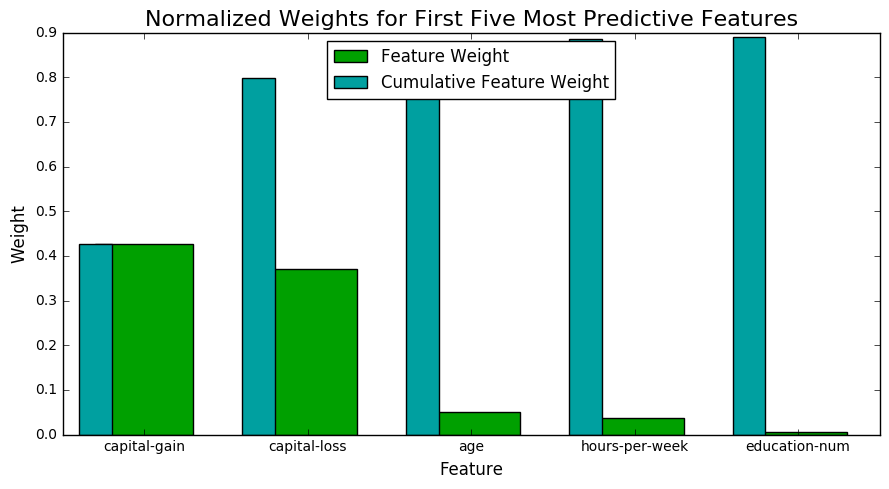

In [32]:
# TODO: Import a supervised learning model that has 'feature_importances_'

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, random_state=0,n_estimators=1000).fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:**


The group of 5 features that I had chosen contains the same 5 features that have more weight as show the feature_importances from Adaboost Classifier, however the order of importance is not the same: (more to less importance).


|Importance    |     My Chose   | Predictor Chose     |                                                                             
|:------------:| :------------: | :-----------------: |                                                                          
|    1º        | Education Num  |     Capital-Gain    |                                                                             
|    2º        | Age            |     Capital-Loss    |                                                                             
|    3º        | Hours-per-week |     Age             |                                                                             
|    4º        | Capital-Gain   |     Hours-per-week  |                                                                             
|    5º        | Capital-Loss   |     Education Num   |                                                                             


The result of the five first important variable was showed in the graph before. The graph shows that capital gain has more weight than the others variable and decrease with the following features: capital-loss, age, hours-per-week and education_num.

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [33]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print ("Final Model trained on full data\n------")
print ("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print ("\nFinal Model trained on reduced data\n------")
print ("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8676
F-score on testing data: 0.7448

Final Model trained on reduced data
------
Accuracy on testing data: 0.8433
F-score on testing data: 0.7053


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**

The result of accuracy and fscore of the final model that was trained on reduced data is slightly smaller than the model that was trained on full data, but this difference is acceptable when we face timing process problem (in case of records increase). The difference in F-score is bigger then the Accuracy and I thin it happens because the model cannot learn the complexity of the data when is running on reduced data.
I image that , the real importance is delivery a good solution to resolve the problem in question, training time can be a trouble but not an impediment, so I could consider using the reduced data as my training set.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.